In [ ]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.0 MB/s eta 0:0

In [ ]:
from fastai.vision.all import *

In [ ]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [ ]:
#!export
model = load_learner('tradiotional_clothing_recognition-v1.pkl')

In [ ]:
categories = [
    "kimono (Japan)",
    "hanbok (South Korea)",
    "cheongsam/qipao (China)",
    "sari (India)",
    "thawb/dishdasha (Saudi Arabia)",
    "dirndl (Germany)",
    "kilt (Scotland)",
    "ao dai (Vietnam)",
    "boubou (West Africa)",
    "huipil (Mexico)",
    "sarong (Indonesia)",
    "chador (Iran)",
    "traje de flamenca (Spain)",
    "batik (Malaysia)",
    "thobe (Palestine)",
    "national dress (Norway)",
    "national costume (Philippines)",
    "barong tagalog (Philippines)",
    "abaya (United Arab Emirates)",
    "folkdräkt (Sweden)",
    "ao po'i (Paraguay)",
    "pounamu piupiu (New Zealand)",
    "kaftan (Morocco)"
]
def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(categories, map(float, probs)))

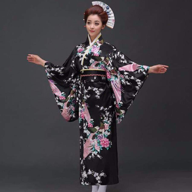

In [ ]:
img = PILImage.create(f'unknown-1.jpg')
img.thumbnail((192,192))
img

In [ ]:
recognize_image(img)

{'kimono (Japan)': 3.039119837922044e-05,
 'hanbok (South Korea)': 0.00026097308727912605,
 'cheongsam/qipao (China)': 9.200982162838045e-07,
 'sari (India)': 1.4729216673003975e-06,
 'thawb/dishdasha (Saudi Arabia)': 1.62081287271576e-05,
 'dirndl (Germany)': 4.745931437355466e-05,
 'kilt (Scotland)': 2.069252877845429e-05,
 'ao dai (Vietnam)': 0.00028415146516636014,
 'boubou (West Africa)': 7.29018381662172e-07,
 'huipil (Mexico)': 0.00010681543062673882,
 'sarong (Indonesia)': 0.00015180723858065903,
 'chador (Iran)': 1.9500197595334612e-05,
 'traje de flamenca (Spain)': 1.9817616703221574e-05,
 'batik (Malaysia)': 4.4932971832167823e-07,
 'thobe (Palestine)': 0.6253378391265869,
 'national dress (Norway)': 0.37217476963996887,
 'national costume (Philippines)': 0.00039766140980646014,
 'barong tagalog (Philippines)': 3.984975137427682e-06,
 'abaya (United Arab Emirates)': 1.5120702983040246e-06,
 'folkdräkt (Sweden)': 2.1541298337979242e-05,
 "ao po'i (Paraguay)": 0.00011518658720

In [ ]:
#!export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = [
    'unknown-1.jpg',
    'unknown-2.jpg',
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://897f24d5bf9ba00855.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)



Notebook to Python Script Export

In [ ]:
!pip install nbdev


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nbdev.export import notebook2script

In [ ]:
notebook2script('app.ipynb')